In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = 'temp11_09batch.csv'
df = pd.read_csv(data)

In [144]:
print(df)

                 DateTime Heater_Sp  Pump_Sp  RefluxValve_Sp  \
0     11/09/2023 14:06:21      12,5      100               0   
1     11/09/2023 14:06:22      12,5      100               0   
2     11/09/2023 14:06:23      12,5      100               0   
3     11/09/2023 14:06:24      12,5      100               0   
4     11/09/2023 14:06:25      12,5      100               0   
...                   ...       ...      ...             ...   
8996  11/09/2023 16:36:17        75      100               0   
8997  11/09/2023 16:36:18        75      100               0   
8998  11/09/2023 16:36:19        75      100               0   
8999  11/09/2023 16:36:20        75      100               0   
9000  11/09/2023 16:36:21        75      100               0   

                TE1_PV           TE10_PV           TE11_PV           TE12_PV  \
0     22,2000007629395  20,7999992370605                22  21,7999992370605   
1     22,2000007629395  20,7999992370605                22  21,79999923

In [56]:
power = df['Heater_Sp']

In [130]:
power_250=[]
power_500=[]
power_750=[]
power_1000=[]
power_1250=[]
power_1500=[]
power_70=[]
for i in range(9001):
    if power[i]=='12,5':
        power_250.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])
    elif power[i]=='25':
        power_500.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])
    elif power[i]=='37,5':
        power_750.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])
    elif power[i]=='50':
        power_1000.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])
    elif power[i]=='62,5':
        power_1250.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])
    elif power[i]=='75':
        power_1500.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])
    elif power[i]=='70':
        power_70.append(df[['DateTime', 'Heater_Sp']].iloc[i-1:i])


In [111]:
len(power) == len(power_250)+len(power_500)+len(power_750)+len(power_1000)+len(power_1250)+len(power_1500)+len(power_70)

True

In [143]:
power_1000[-5:]

[                 DateTime Heater_Sp
 6432  11/09/2023 15:53:33        50,
                  DateTime Heater_Sp
 6433  11/09/2023 15:53:34        50,
                  DateTime Heater_Sp
 6434  11/09/2023 15:53:35        50,
                  DateTime Heater_Sp
 6435  11/09/2023 15:53:36        50,
                  DateTime Heater_Sp
 6436  11/09/2023 15:53:37        50]

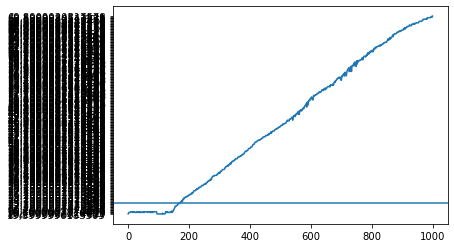

In [19]:
reboiler_temp = df['TE9_PV']
plt.plot(reboiler_temp[:1000])
plt.axhline(15)
plt.show()

In [33]:
df['TE9_PV']=df['TE9_PV'].replace(',', '.', regex=True)
df['TE9_PV']=df['TE9_PV'].astype(float)

df['Heater_Sp']=df['Heater_Sp'].replace(',', '.', regex=True)
df['Heater_Sp']=df['Heater_Sp'].astype(float)

df['TE1_PV']=df['TE1_PV'].replace(',', '.', regex=True)
df['TE1_PV']=df['TE1_PV'].astype(float)

In [24]:
df.TE9_PV

0       19.900000
1       20.100000
2       19.799999
3       19.799999
4       19.799999
          ...    
8996    66.800003
8997    66.599998
8998    66.599998
8999    66.599998
9000    66.599998
Name: TE9_PV, Length: 9001, dtype: float64

In [25]:
df[df.TE9_PV > 64.8].iloc[0]

DateTime          11/09/2023 14:20:48
Heater_Sp                          70
Pump_Sp                            10
RefluxValve_Sp                      0
TE1_PV               22,1000003814697
TE10_PV              20,7999992370605
TE11_PV              16,6000003814697
TE12_PV              16,7999992370605
TE13_PV                          21,5
TE14_PV              21,7999992370605
TE2_PV               22,2000007629395
TE3_PV               21,7999992370605
TE4_PV               22,1000003814697
TE5_PV               21,2999992370605
TE6_PV               21,8999996185303
TE7_PV                             24
TE8_PV                           26,5
TE9_PV                      64.800003
wwResolution                     1000
Name: 867, dtype: object

In [30]:
df[df.Heater_Sp == 70].iloc[0]

DateTime          11/09/2023 14:08:17
Heater_Sp                        70.0
Pump_Sp                            10
RefluxValve_Sp                      0
TE1_PV               22,1000003814697
TE10_PV              20,7999992370605
TE11_PV              20,3999996185303
TE12_PV              20,7000007629395
TE13_PV              21,6000003814697
TE14_PV              21,8999996185303
TE2_PV               22,1000003814697
TE3_PV               21,8999996185303
TE4_PV                             22
TE5_PV                             21
TE6_PV               21,2999992370605
TE7_PV               22,7999992370605
TE8_PV                             23
TE9_PV                           19.9
wwResolution                     1000
Name: 116, dtype: object

In [32]:
# takes 12 minutes 31 seconds from start of heating to reach boiling point of methanol
# theoretical 10 minutes 40 seconds
efficiency = 640/751
print(efficiency)

0.8521970705725699


In [34]:
df[df.TE1_PV > 64.8].iloc[0] #top tray reaching methanol bp

DateTime          11/09/2023 14:25:32
Heater_Sp                        70.0
Pump_Sp                            10
RefluxValve_Sp                      0
TE1_PV                      64.800003
TE10_PV              63,2999992370605
TE11_PV              15,6999998092651
TE12_PV                          16,5
TE13_PV              21,2000007629395
TE14_PV              21,6000003814697
TE2_PV               66,4000015258789
TE3_PV               66,5999984741211
TE4_PV               67,1999969482422
TE5_PV               67,4000015258789
TE6_PV               68,6999969482422
TE7_PV               70,8000030517578
TE8_PV               71,5999984741211
TE9_PV                      70.099998
wwResolution                     1000
Name: 1151, dtype: object